# Desafio DS
## Victor Gabriel Ferreira Barbosa

## Inclusão de bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as metrics
import seaborn as sns
import statsmodels.api as sm
import pylab
from scipy import stats
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import geohash as gh
from scipy import stats

In [2]:
sns.set(rc={'figure.figsize':(13,10)})

## Leitura da base de dados

In [3]:
houses = pd.read_csv('housing.csv')

## Verificando a quantidade de registros

In [4]:
houses.shape

(20640, 10)

In [5]:
houses.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Descrição das colunas

## 1. longitude: uma medida de quão longe a oeste está uma casa; um valor mais alto está mais a oeste

## 2. latitude: uma medida de quão distante ao norte está uma casa; um valor mais alto está mais ao norte

## 3. housing_median_age: Idade média de uma casa dentro de um quarteirão; um número menor é um prédio mais novo

## 4. total_rooms: Número total de quartos em um bloco

## 5. total_bedrooms: número total de quartos em um bloco

## 6. population: número total de pessoas que residem em um bloco

## 7. households: número total de famílias, um grupo de pessoas que residem em uma unidade domiciliar, para um bloco

## 8. median_income: renda média para famílias dentro de um bloco de casas (medida em dezenas de milhares de dólares americanos)

## 9. median_house_value: valor médio da casa para famílias dentro de um quarteirão (medido em dólares americanos)

## 10. ocean_proximity: Localização da casa w.r.t oceano / mar



In [6]:
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### A base possui 20640 registros.
### A variavel “median_house_value” é a variavel alvo.

## Verificando os tipos das variaveis

In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Coeficiente de correlação de Pearson

<AxesSubplot:>

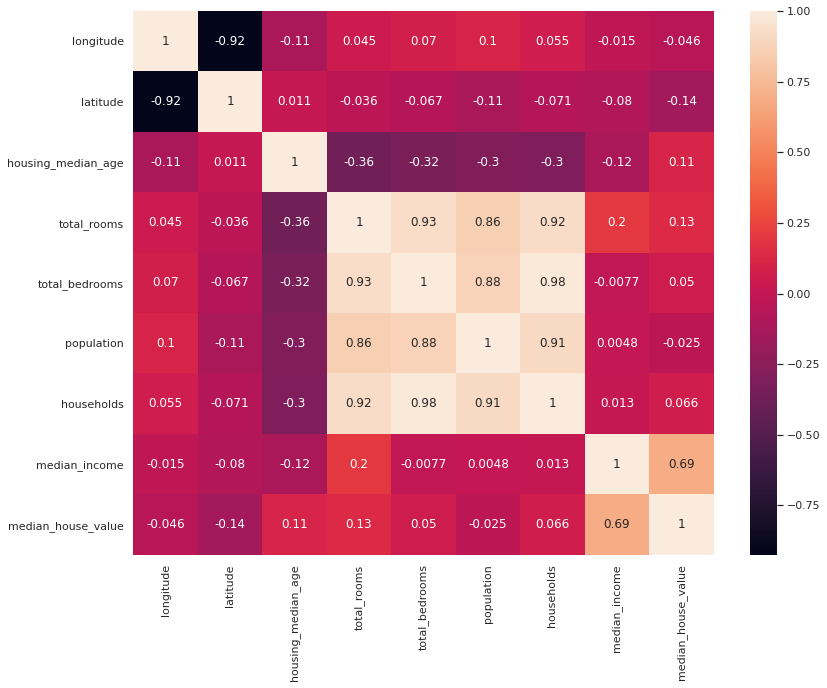

In [9]:
sns.heatmap(houses.corr(), annot=True)

### O atributo com uma maior correlação com o “median_house_value”  é o “median_income”, com uma forte correlação positiva (0,69).

### Os demais atributos não possuem valores expressivos de correlação com o “median_house_value”, dessa forma foi analisado uma análise com a combinação dos atributos. 


## Verificando a existência de valores nulos nas colunas

In [10]:
houses.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Percentual de nulos na coluna "total_bedrooms" em relação ao todo

In [11]:
(houses['total_bedrooms'].isnull().sum()/len(houses)) * 100

1.002906976744186

### O atributo “total_bedrooms” possui 207 valores nulos, o que corresponde a 1% da base de dados. Como a quantidade é pequena, será realizada a substituição desses valores pela mediana da base de treinamento.

### A substituição é feita após realizar a divisão da base em treinamento e teste

# Analise de variaveis

## Latitude e Longitude

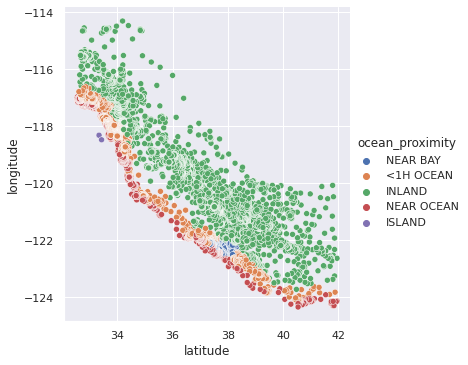

In [12]:

sns.relplot(x="latitude", y="longitude", hue="ocean_proximity", data=houses)

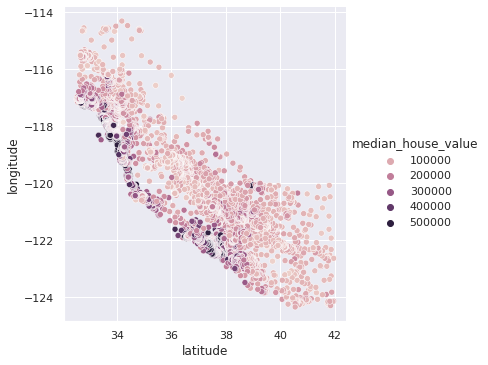

In [13]:

sns.relplot(x="latitude", y="longitude", hue="median_house_value", data=houses)

### Observa-se que as casas mais próximas ao mar e a baía possuem valores mais altos.


## housingMedianAge: Idade média de uma casa dentro de um quarteirão; um número menor é um prédio mais novo

In [14]:
houses['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

### Verificando se todos os valores são inteiros

In [15]:
houses['housing_median_age'].apply(float.is_integer).all()

True

In [16]:
houses['housing_median_age'] = houses['housing_median_age'].astype('int64')

### Presença de uma grande quantidade de registros com o valor 52.

<AxesSubplot:xlabel='housing_median_age'>

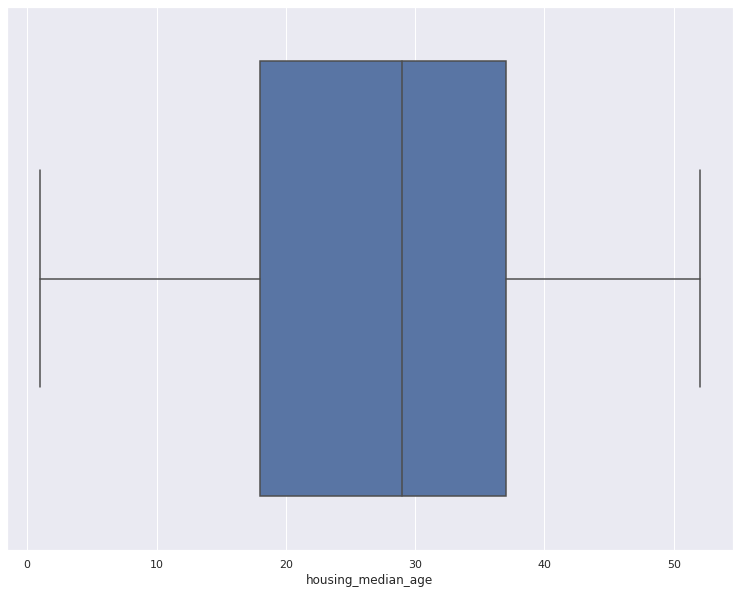

In [17]:
 sns.boxplot(x=houses["housing_median_age"])

<AxesSubplot:xlabel='housing_median_age', ylabel='count'>

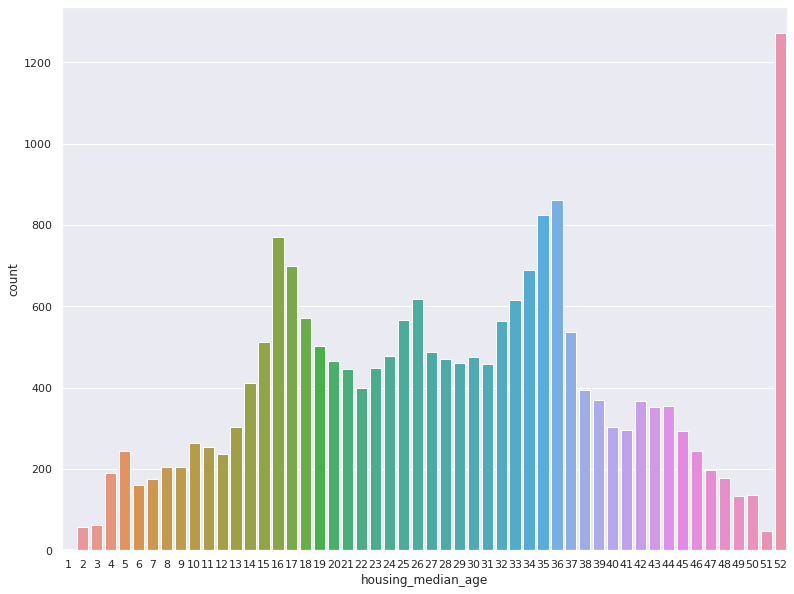

In [18]:
sns.countplot(x='housing_median_age', data=houses)

### Foram realizados testes buscando melhorias nesta variável por meio de  transformações, entretanto não foram obtidos melhores resultados.

## total_rooms: Número total de quartos em um bloco

In [19]:
houses['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

### Verificando se todos os valores são inteiros

In [20]:
houses['total_rooms'].apply(float.is_integer).all()

True

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

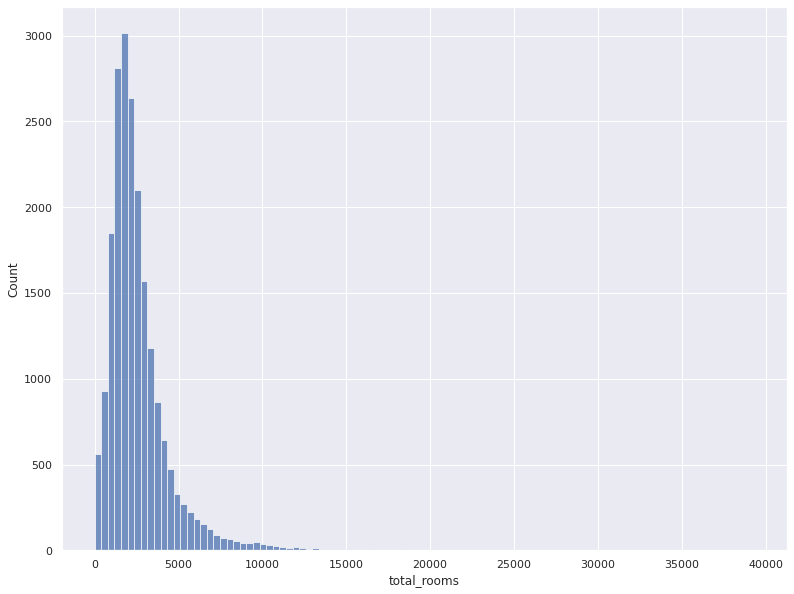

In [21]:
sns.histplot(x = 'total_rooms', data=houses, bins=100)

<AxesSubplot:xlabel='total_rooms'>

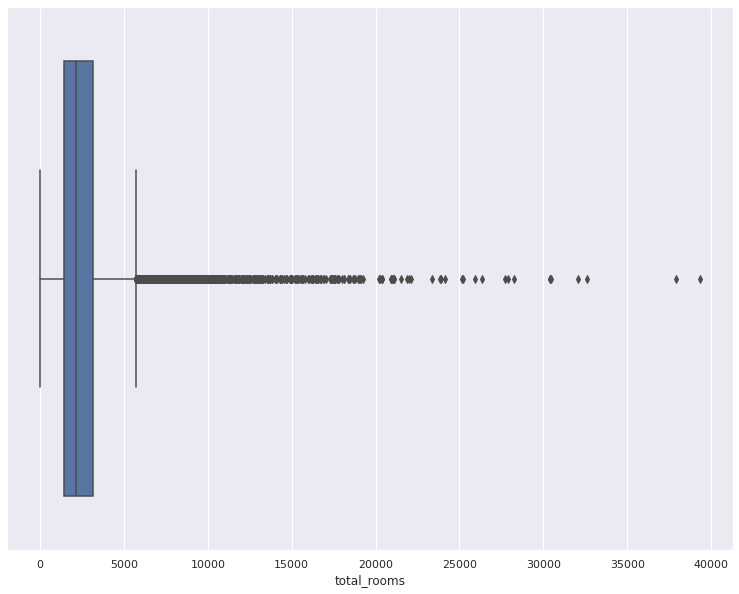

In [22]:
 sns.boxplot(x=houses["total_rooms"])

### Embora apresente alguns outliers, estes foram mantidos pois não aparentam ser provenientes de erros, a população desses registros também são altas.


In [23]:
houses[houses['total_rooms'] > 35000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10309,-117.74,33.89,4,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
13139,-121.44,38.43,3,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


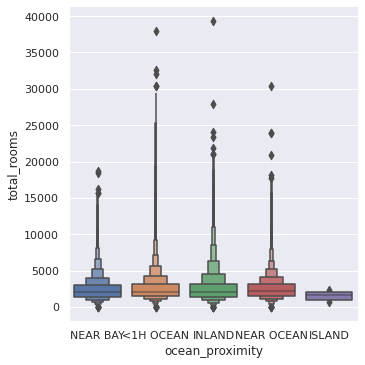

In [24]:
sns.catplot(x="ocean_proximity", y="total_rooms", kind="boxen", data=houses)

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

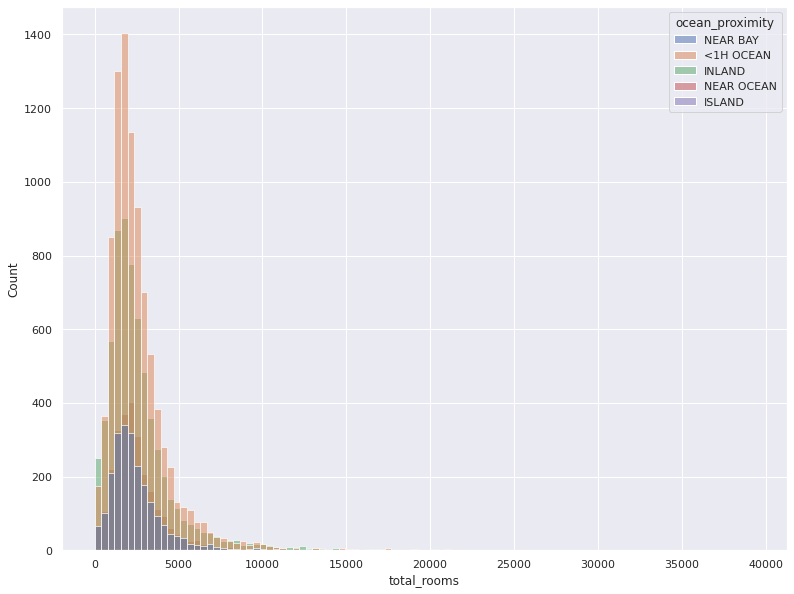

In [25]:
sns.histplot(x = 'total_rooms', hue='ocean_proximity', data=houses, bins=100)

### A quantidade de quartos não varia muito de acordo com a proximidade com o oceano.


## total_bedrooms

### Verificando se todos os valores são inteiros

In [26]:
houses['total_rooms'].apply(float.is_integer).all()

True

### Verificando percentual de nulos

In [27]:
houses['total_bedrooms'].isnull().sum()

207

In [28]:
(houses['total_bedrooms'].isnull().sum()/len(houses)) * 100

1.002906976744186

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

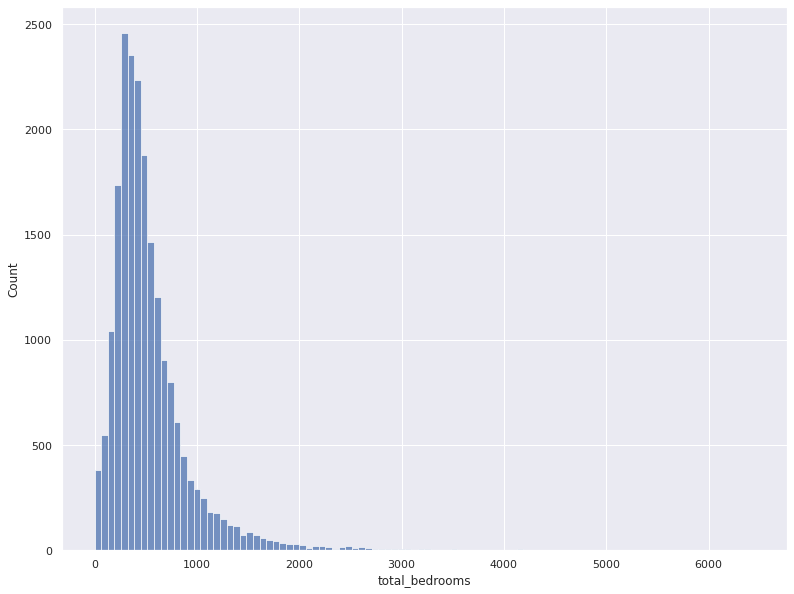

In [29]:
sns.histplot(x = 'total_bedrooms', data=houses, bins=100)

<AxesSubplot:xlabel='total_bedrooms'>

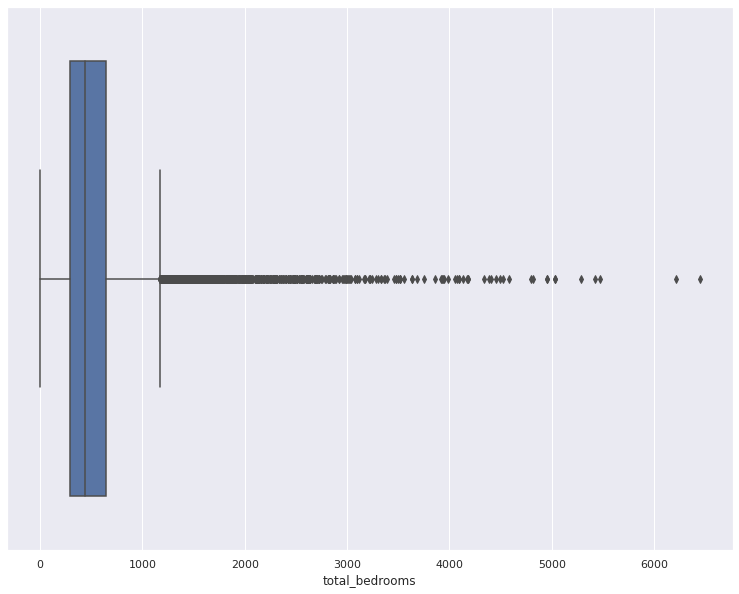

In [30]:
 sns.boxplot(x=houses["total_bedrooms"])

### Assim como o total_rooms, embora apresente alguns outliers, estes foram mantidos pois não aparentam ser provenientes de erros, a população desses registros também são altas.

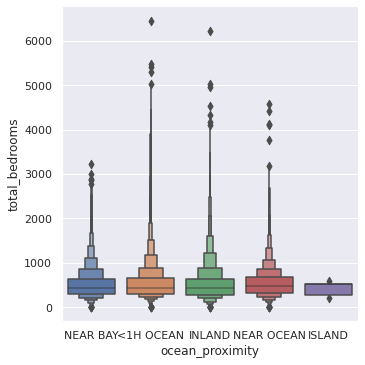

In [31]:
sns.catplot(x="ocean_proximity", y="total_bedrooms", kind="boxen", data=houses)

In [32]:
houses[houses['total_bedrooms'] > 6000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9880,-121.79,36.64,11,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
13139,-121.44,38.43,3,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

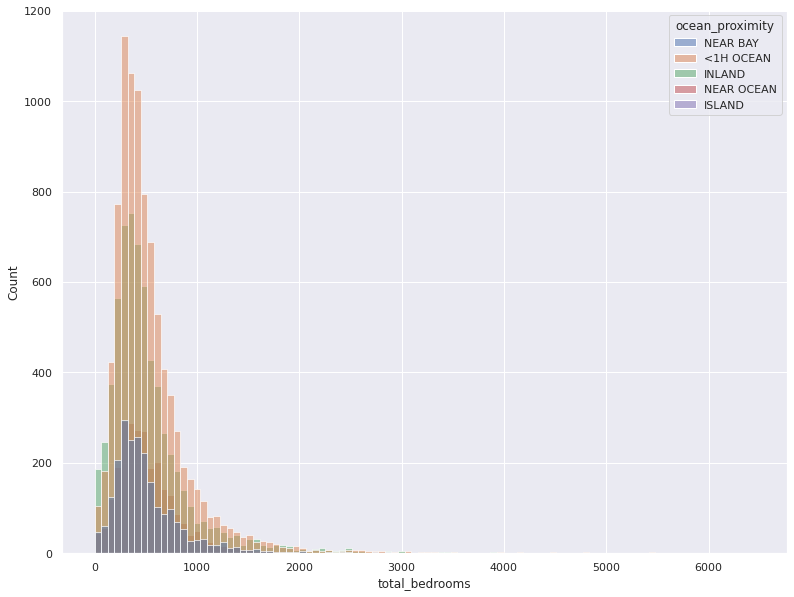

In [33]:
sns.histplot(x = 'total_bedrooms', hue='ocean_proximity', data=houses, bins=100)

### A quantidade de quartos de dormir também não varia muito de acordo com a proximidade com o oceano.


## population : número total de pessoas que residem em um bloco

In [34]:
len(houses['population'].unique())

3888

<AxesSubplot:xlabel='population', ylabel='Count'>

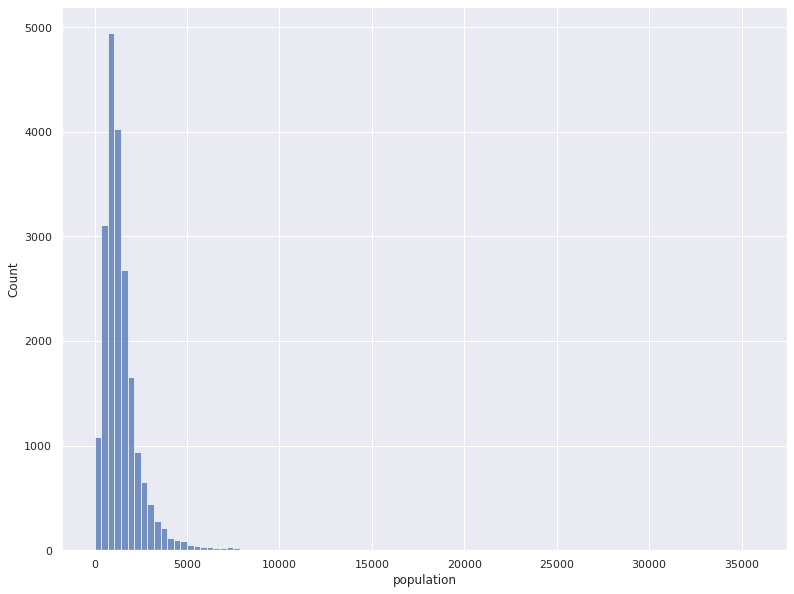

In [35]:
sns.histplot(x = 'population', data=houses, bins=100)

<AxesSubplot:xlabel='population'>

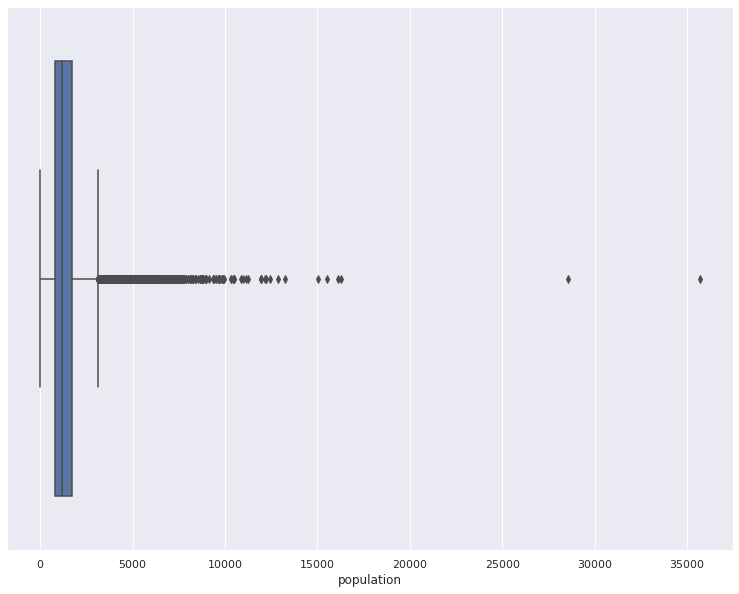

In [36]:
 sns.boxplot(x=houses["population"])

### Foram identificados alguns outliers, mas como os atributos “total_rooms”, “totalbedrooms” e “households” também são altos para estes valores, foi decidido mantê-los.

In [37]:
houses[houses['population'] > 20000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9880,-121.79,36.64,11,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
15360,-117.42,33.35,14,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN


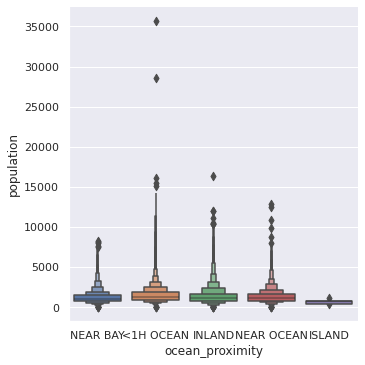

In [38]:
sns.catplot(x="ocean_proximity", y="population", kind="boxen", data=houses)

In [39]:
#houses.drop(houses[houses['population'] > 20000].index, inplace=True)

<AxesSubplot:xlabel='population', ylabel='Count'>

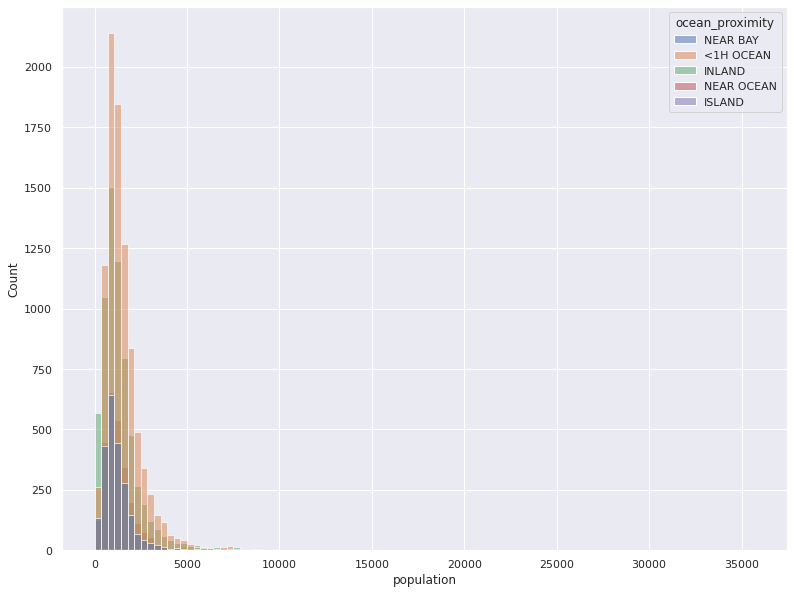

In [40]:
sns.histplot(x = 'population', hue='ocean_proximity', data=houses, bins=100)

### A população de acordo com a proximidade com o oceano não varia muito.


## households: número total de famílias para um bloco

<AxesSubplot:xlabel='households', ylabel='Count'>

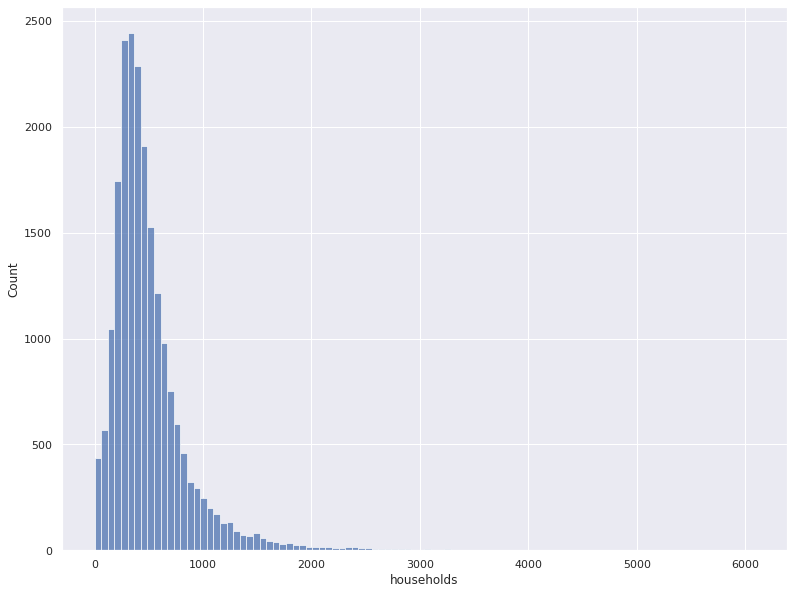

In [41]:
sns.histplot(x = 'households', data=houses, bins=100)

<AxesSubplot:xlabel='households'>

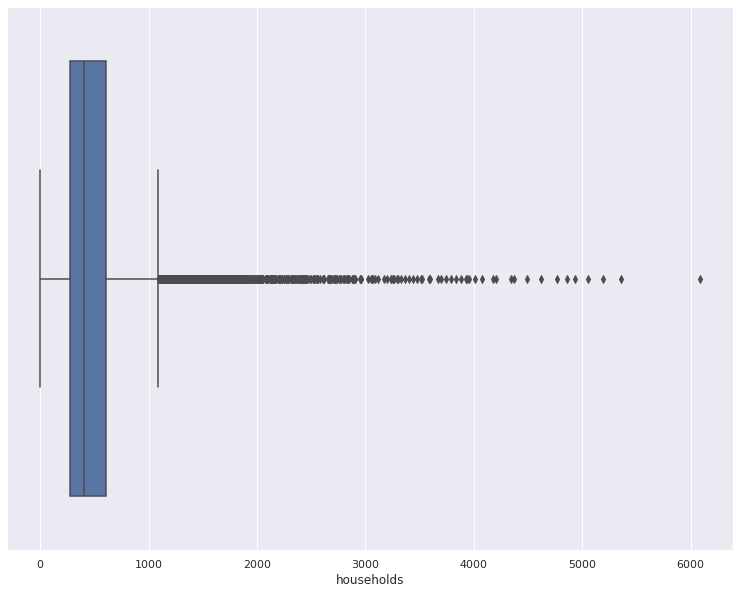

In [42]:
sns.boxplot(x=houses["households"])

### Assim como total_rooms e total_bedrooms, foram identificados alguns outliers, mas como a população  desses registros também é alta, foi decidido mantê-los.


In [43]:
houses[houses['households'] > 5000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6057,-117.78,34.03,8,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
9880,-121.79,36.64,11,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
10309,-117.74,33.89,4,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
13139,-121.44,38.43,3,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


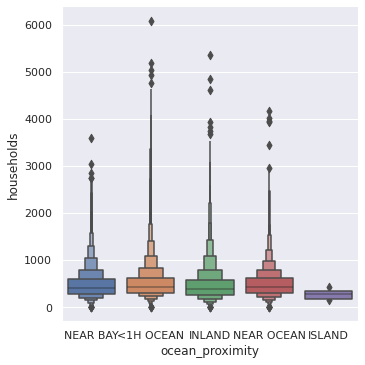

In [44]:
sns.catplot(x="ocean_proximity", y="households", kind="boxen", data=houses)

### O número total de familia por bloco não sofre muita variação de acordo com a proximidade com o oceano.


## median_income : renda média para famílias dentro de um bloco de casas

<AxesSubplot:xlabel='median_income', ylabel='Count'>

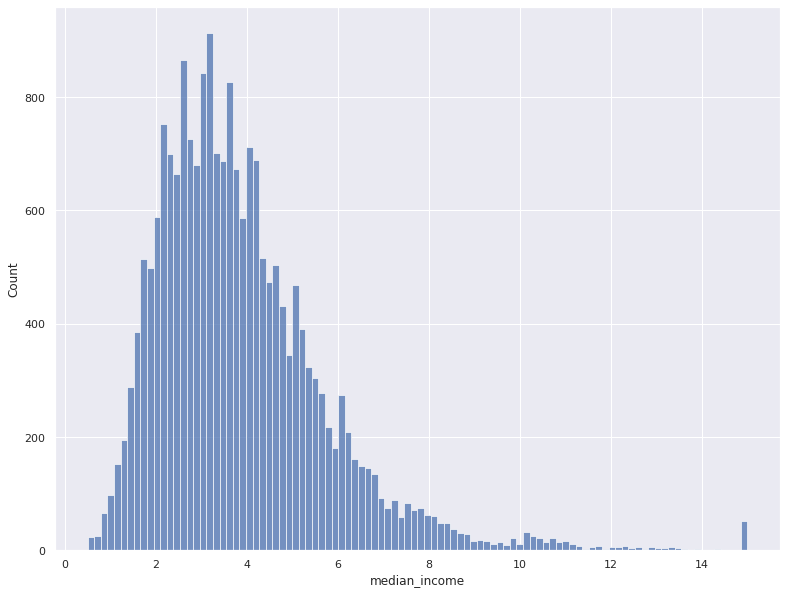

In [45]:
sns.histplot(x = 'median_income', data=houses, bins=100)

<AxesSubplot:xlabel='median_income'>

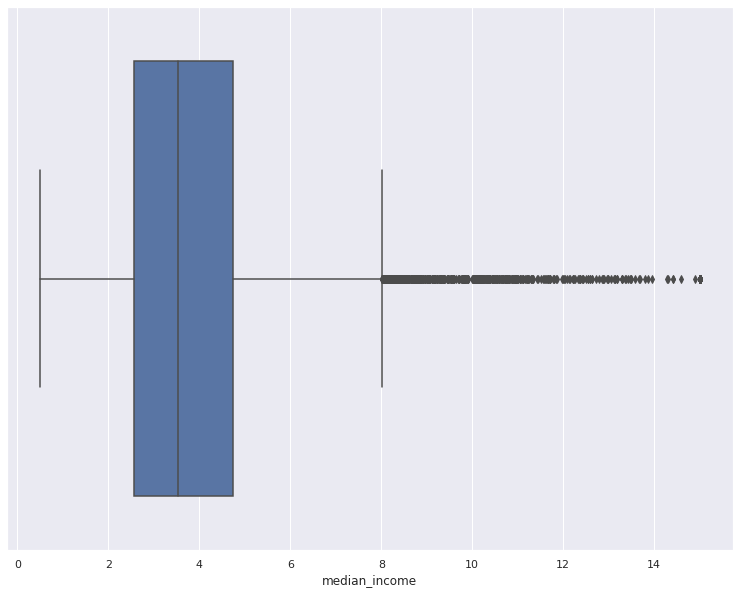

In [46]:
sns.boxplot(x=houses["median_income"])

In [47]:
houses[houses['median_income'] > 14];

### Ao analisar os outliers encontrados, verificou-se que a grande parte são próximas ao oceano, como foi identificado que casas mais próximas ao oceano possuem valores elevados, a presença de família com maior poder aquisitivo fazem sentido, desta forma os outliers foram mantidos.


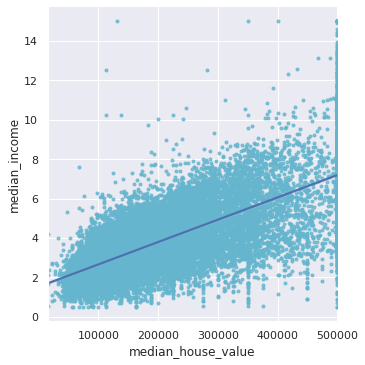

In [48]:
sns.lmplot(x="median_house_value", y="median_income", data=houses,  markers=".", scatter_kws=dict(color='c'));

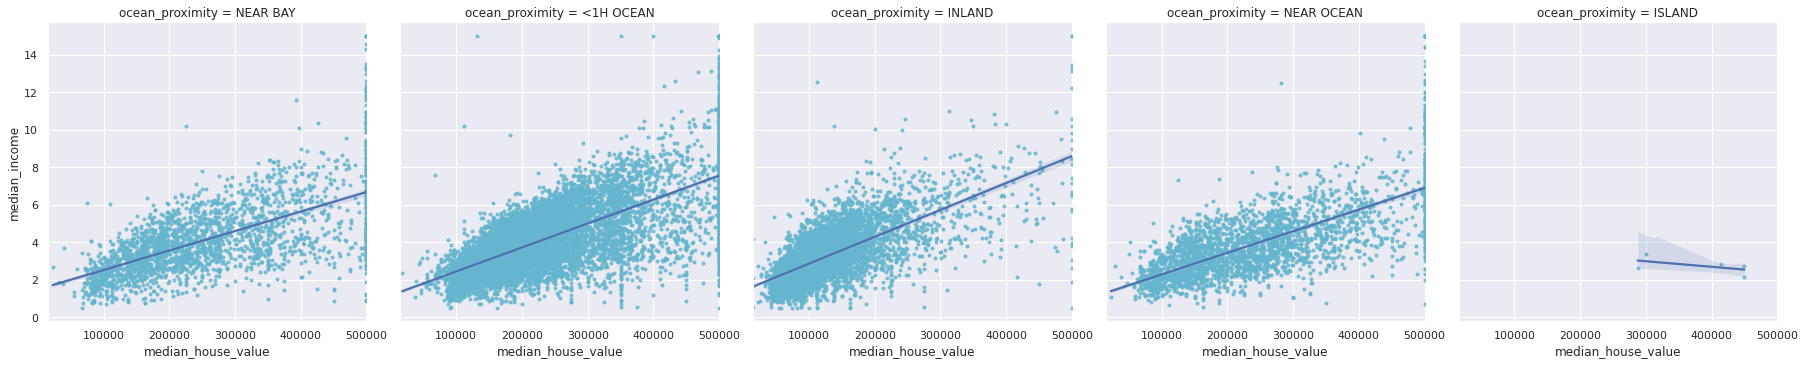

In [49]:
sns.lmplot(x="median_house_value", y="median_income", col="ocean_proximity", data=houses,  markers=".", scatter_kws=dict(color='c'));

### Como verificado pelo coeficiente de pearson, existe uma alta correlação entre o median_income e com a variável alvo (median_house_value).


<AxesSubplot:xlabel='median_income', ylabel='Count'>

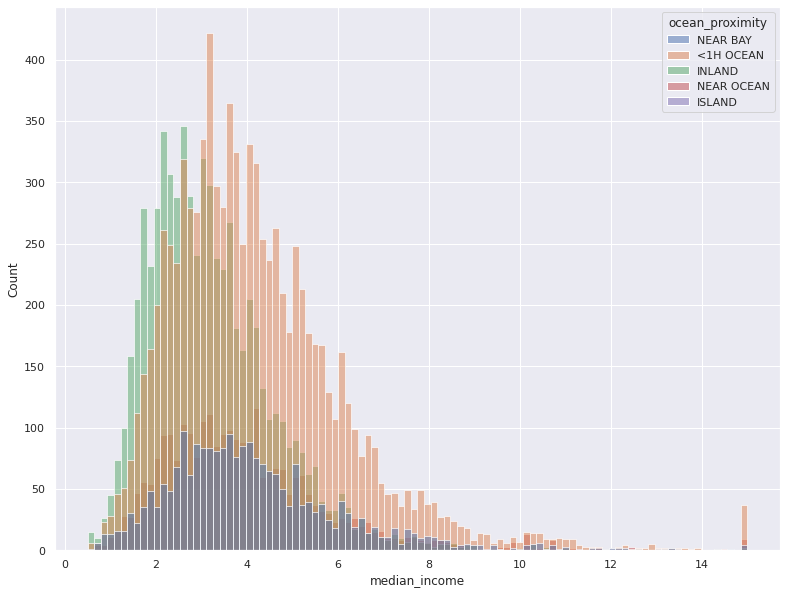

In [50]:
sns.histplot(x = 'median_income', hue='ocean_proximity', data=houses, bins=100)

## A renda média das famílias no interior é inferior a aquelas próxima ao oceano.


## ocean_proximity : Proximidade com o oceano

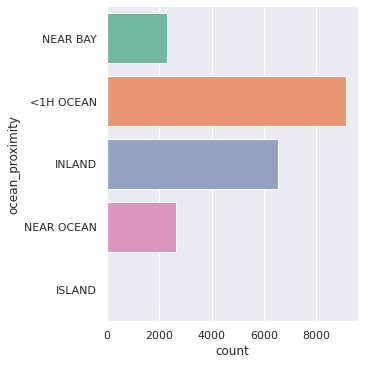

In [51]:
sns.catplot(y="ocean_proximity", kind="count", palette="Set2", data=houses)

In [52]:
houses[houses['ocean_proximity'] == 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


### A quantidade de registros de acordo com a proximidade com o oceano varia bastante, possuindo apenas 5 registros na categoria “island” (na ilha).


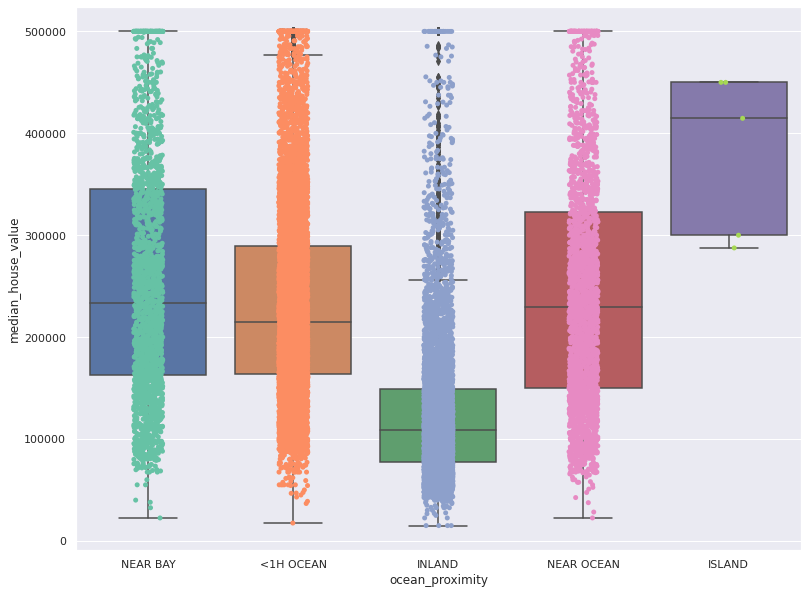

In [53]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=houses)
sns.stripplot(x="ocean_proximity", y="median_house_value", palette="Set2", data=houses);

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

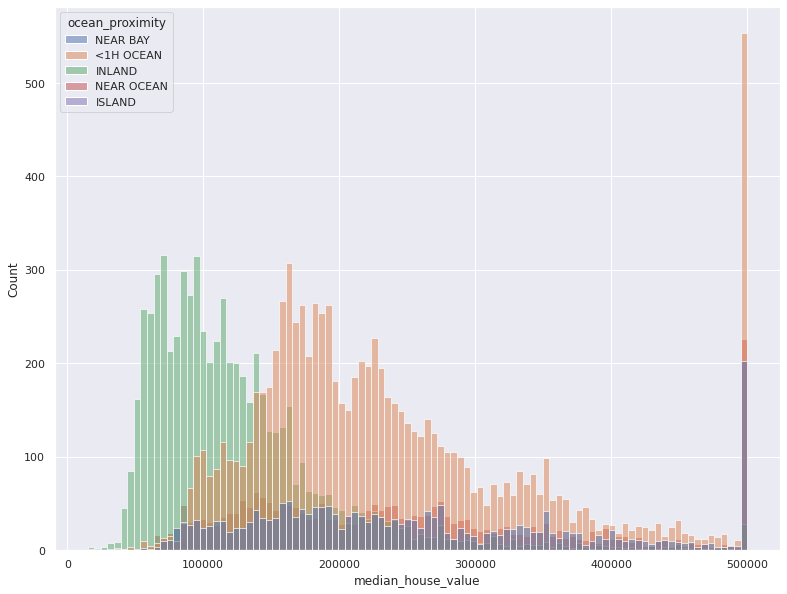

In [54]:
sns.histplot(x = 'median_house_value', hue='ocean_proximity', data=houses, bins=100)

### Como verificado anteriormente, as casas no interior possuem um valor inferior quando comparado as próximas ao oceano.

## Transformação - ocean_proximity

In [55]:
houses.loc[houses['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 0 
houses.loc[houses['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 1 
houses.loc[houses['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 1
houses.loc[houses['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 2
houses.loc[houses['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 3

houses['ocean_proximity'] = houses['ocean_proximity'].astype('int64')

## median_house_value : valor médio da casa para famílias dentro de um quarteirão

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

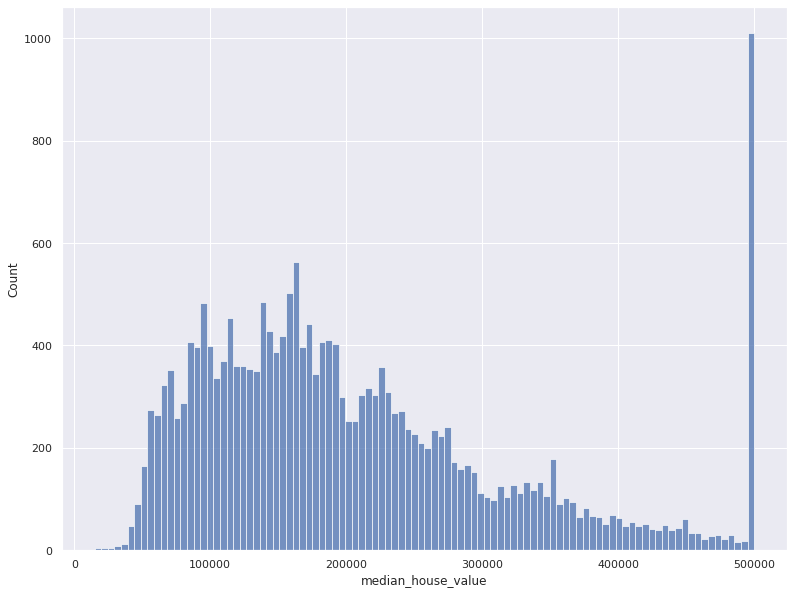

In [56]:
sns.histplot(x = 'median_house_value', data=houses, bins=100)

In [57]:
houses['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [58]:
len(houses[houses['median_house_value'] == 500001])

965

### Existe uma grande quantidade de registros com valores em torno de 500000, inicialmente foi removido alguns destes registros na base de treino, pois estavam atrapalhando a predição do modelo, mas posteriormente com as transformações e inclusão de novas variáveis o modelo não apresentou mais problemas quando estes valores foram reintroduzidos no treinamento. Desta forma, foram mantidos os registros.


## Divisão treinamento e teste

In [59]:
houses_median_value = houses['median_house_value']
houses = houses.drop(columns=['median_house_value'])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(houses, houses_median_value, test_size = 0.15, random_state= 0, shuffle = True)

In [61]:
X_train = X_train.copy()
X_test = X_test.copy()

### Existe uma grande quantidade de registros com valores em torno de 500000, inicialmente foi removido alguns destes registros na base de treino, pois estavam atrapalhando a predição do modelo, mas posteriormente com as transformações e inclusão de novas variáveis o modelo não apresentou mais problemas quando estes valores foram reintroduzidos no treinamento. Desta forma, foram mantidos os registros.


## Remoção de valores nulos

In [62]:
 X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace = True)
 X_test['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace = True)

## Novas variáveis


### A utilização das variáveis a seguir foram validadas verificando se o modelos apresentava uma redução nas métricas erro médio absoluto e erro médio quadrático


## population-households

### A variável population_households foi obtida realizando a divisão entre population (população) e households (famílias), de maneira a obter a quantidade de pessoas em uma família em um bloco.

In [63]:
X_train['population-households'] =  X_train['population'] / X_train['households']
X_test['population-households'] =  X_test['population'] / X_test['households']

## median_income-person


### A variável median_income-person foi obtida realizando a divisão entre a variável median_income e population-households. O objetivo é obter  a receita média por pessoa.

In [64]:
X_train['median_income-person'] = X_train['median_income'] / X_train['population-households']
X_test['median_income-person'] = X_test['median_income'] / X_test['population-households']

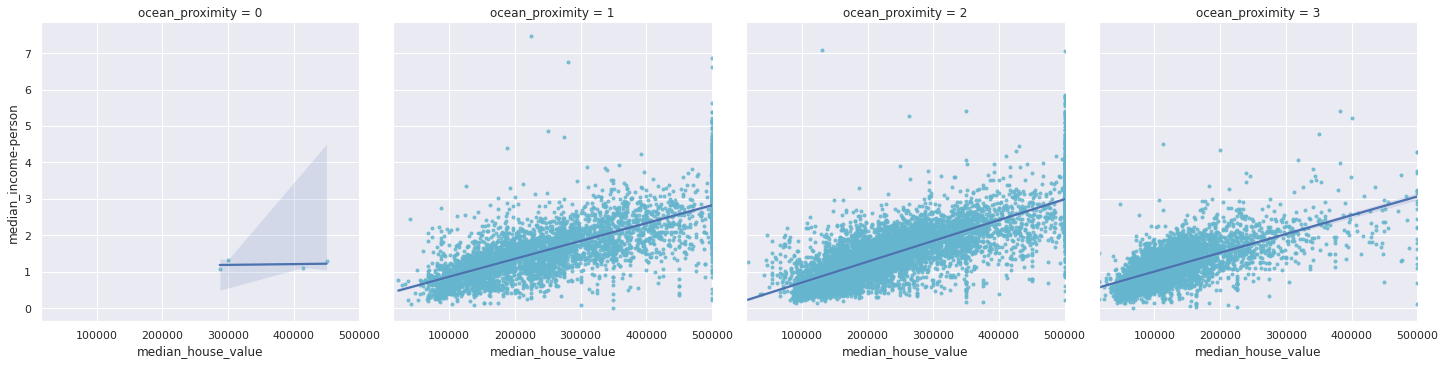

In [65]:
aux = pd.concat([X_train, y_train], axis = 1)
sns.lmplot(x='median_house_value', y='median_income-person',data = aux, col ='ocean_proximity', markers=".", scatter_kws=dict(color='c'));

### Esta nova variável obteve uma correlação de 0.75 com a variável alvo, sendo este valor superior a maior correlação anterior, a median_income com 0.69 . Após análises foi decidido realizar a remoção da variável median_income, o que proporcionou uma melhora no modelo.


In [66]:
X_train = X_train.drop(columns=['median_income'])
X_test = X_test.drop(columns=['median_income'])

## total_rooms_bedrooms

### Foi identificado uma forte correlação positiva (0.93) entre as variáveis total_rooms e total_bedrooms, assim foi criada a variável total_rooms-bedrooms que consiste na divisão de total_rooms e total_bedrooms.


In [67]:
X_train['total_rooms-bedrooms'] = X_train['total_rooms'] / X_train['total_bedrooms']
X_test['total_rooms-bedrooms'] = X_test['total_rooms'] / X_test['total_bedrooms']

## population-rooms

### De forma a obter a proporção de pessoas por quarto, foi criada a variável population-rooms que consiste da divisão da variável population por rooms.

In [68]:
X_train['population-rooms'] = X_train['population'] / X_train['total_rooms']
X_test['population-rooms'] = X_test['population'] / X_test['total_rooms']

## household-rooms


In [69]:
X_train['household-rooms'] = X_train['households'] / X_train['total_rooms']
X_test['household-rooms'] = X_test['households'] / X_test['total_rooms']

## geohash

### De acordo com a IBM, “Um geohash é um número que identifica exclusivamente uma região específica. O algoritmo geohash divide a Terra em regiões, chamadas de células, e converte a latitude e a longitude do centro de cada célula em um número que a identifica exclusivamente.”, desta forma, o geohash foi utilizado como uma variável adicional.


In [70]:
X_train['geohash']=X_train.apply(lambda x: gh.encode_uint64(x.latitude, x.longitude), axis=1)
X_test['geohash']=X_test.apply(lambda x: gh.encode_uint64(x.latitude, x.longitude), axis=1)

In [71]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,ocean_proximity,population-households,median_income-person,total_rooms-bedrooms,population-rooms,household-rooms,geohash
1316,-121.80,38.00,34,2738.0,475.0,1316.0,459.0,3,2.867102,1.233580,5.764211,0.480643,0.167641,5590700301802850108
14778,-117.09,32.58,12,2565.0,567.0,1785.0,545.0,1,3.275229,0.924302,4.523810,0.695906,0.212476,5545228239277403112
779,-122.12,37.65,26,162.0,27.0,86.0,25.0,1,3.440000,0.690407,6.000000,0.530864,0.154321,5589891577193337154
5225,-118.25,33.93,40,975.0,270.0,1068.0,270.0,2,3.955556,0.250003,3.611111,1.095385,0.276923,5587481161743566623
14838,-117.10,32.68,49,1412.0,350.0,1200.0,332.0,1,3.614458,0.564345,4.034286,0.849858,0.235127,5545232742252313145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20,1314.0,229.0,712.0,219.0,3,3.251142,1.357216,5.737991,0.541857,0.166667,5590854395133454530
19648,-120.89,37.48,27,1118.0,195.0,647.0,209.0,3,3.095694,0.941146,5.733333,0.578712,0.186941,5591518917365566854
9845,-121.90,36.58,31,1431.0,435.0,704.0,393.0,1,1.791349,1.785080,3.289655,0.491964,0.274633,5589567559798426622
10799,-117.93,33.62,34,2125.0,498.0,1052.0,468.0,2,2.247863,2.505268,4.267068,0.495059,0.220235,5545436417522371029


## Retirada de variveis

### Após a inserção das novas variáveis foi verificada como a remoção de variáveis afetavam o modelo. Durante os teste, observou-se um melhor desempenho quando o total_rooms e total_bedrooms foi removido.


In [72]:
X_train = X_train.drop(columns = ['total_rooms', 'total_bedrooms'])
X_test = X_test.drop(columns = ['total_rooms', 'total_bedrooms'])

## Coeficiente de correlação de Pearson 

<AxesSubplot:>

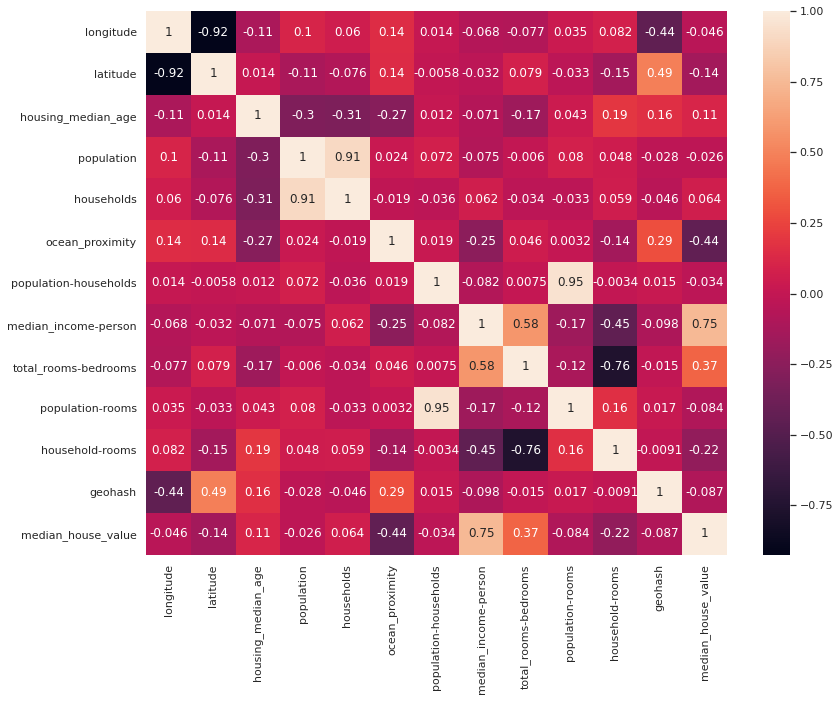

In [73]:
aux = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(aux.corr(), annot=True)

### Pode-se observar que algumas das variáveis criadas obtiveram uma boa correlação com a variável algo, como por exemplo median_income-person (0,75), total_tooms-bedrooms (0,37) e households-rooms (-0.22)

## Escala

### Foi aplicado a todas as variáveis, com exceção da variável alvo, o MinMaxScaler de forma a possuir todas as variáveis na mesma escala o que pode trazer benefícios no ajuste do modelo.

In [74]:
min_max = MinMaxScaler() 

X_train = min_max.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = min_max.transform(X_test)
X_test = pd.DataFrame(X_test)

In [75]:
# regr = RandomForestRegressor()
# regr = xgboost.XGBRegressor()
# regr = LinearRegression()
# regr = DecisionTreeRegressor()
# regr = svm.SVR()

### Os melhores resultados foram obtidos com o XGBRegressor, utilizando o RandomizedSearchCV para determinar os melhores hiperparâmetros.


In [76]:
# tunning = {
#         'learning_rate': [0.01,0.05,0.1],
#         'gamma': [0, 0.5, 1, 1.5],
#         'subsample': [0.6, 0.8, 1.0],
#         'max_depth': [ 4, 5, 6, 7, 8, 10],
#         "n_estimators": [300, 400, 500, 600, 700, 800],
#         }

In [77]:
# regr_tuning = RandomizedSearchCV(regr, 
#                          param_distributions = para_tunning,
#                          cv = 3,  
#                          n_iter = 50,
#                          scoring = 'neg_mean_absolute_error', 
#                          error_score = 0, 
#                          verbose = 3, 
#                          n_jobs = -1,
#                          random_state = 42)

In [78]:
regr =  xgboost.XGBRegressor(subsample = 0.8, n_estimators = 600, max_depth = 8, learning_rate = 0.05, gamma = 1)

In [79]:
regr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=600, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_pred = regr.predict(X_test)

### O valor obtido para o R2, pode ser verificado abaixo

In [81]:
r2_score(y_test, y_pred)

0.868020539658837

###  Isto significa que 86,8% da variância dos dados pode ser explicado pelo modelo.

### Erro quadrático médio

In [82]:
 metrics.mean_squared_error(y_test,y_pred)

1748729017.3706055

### Erro absoluto médio

In [83]:
 metrics.mean_absolute_error(y_test,y_pred)

26827.2861328125

### Análise dos resíduos

In [84]:
residuos = y_test - y_pred

### Verificando se os residuos seguem uma distribuição normal 

/usr/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

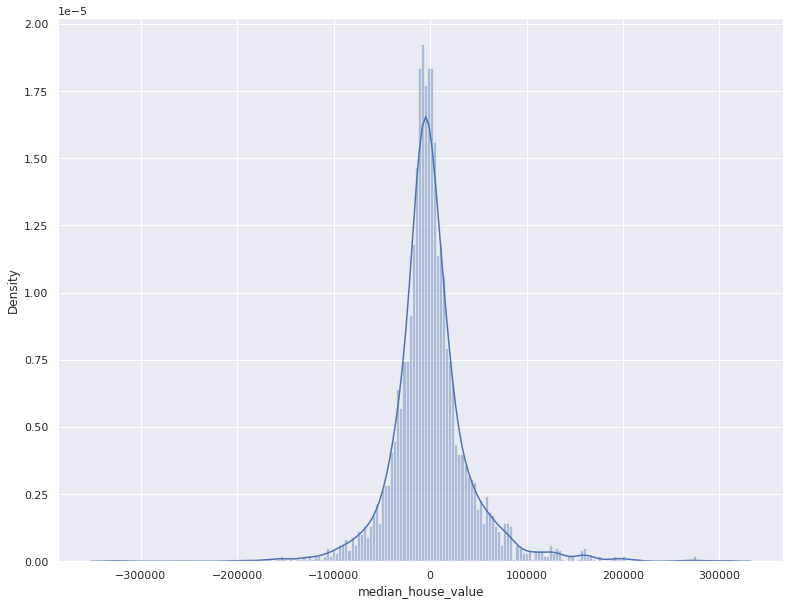

In [85]:
sns.distplot(residuos,bins=200)

### Embora pelo grafico acima os residuos aparentem seguir uma distribuição normal (Gaussiana), ao verificarmos o QQ-plot e o teste de normalidade verificados que a distribuição não é normal

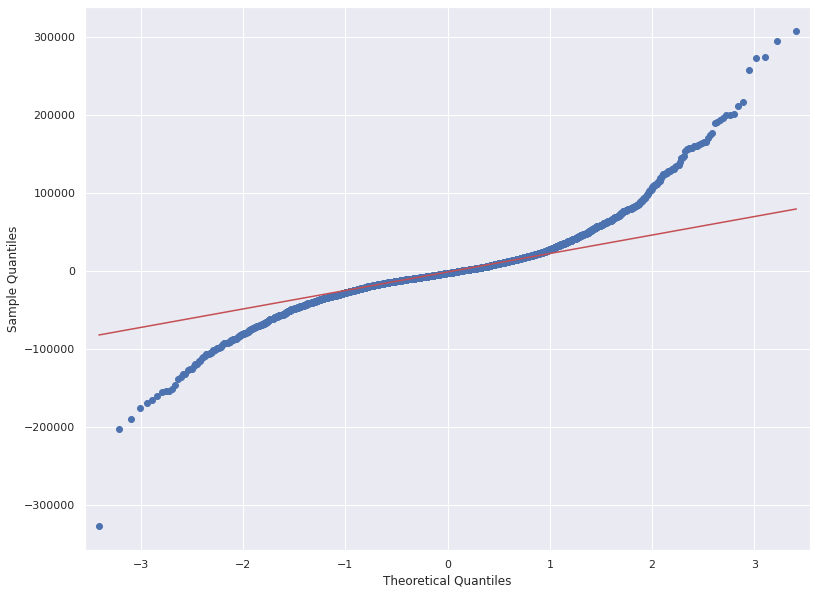

In [96]:
import statsmodels.api as sm
sm.qqplot(residuos,line = 'q');

In [87]:
stats.normaltest(residuos)

NormaltestResult(statistic=814.4979618649475, pvalue=1.3614911425736614e-177)

### Valor de p muito proximo a zero, logo a hipotese nula (H0 = é uma distribuição normal ), é rejeitada.

## Homocedasticidade

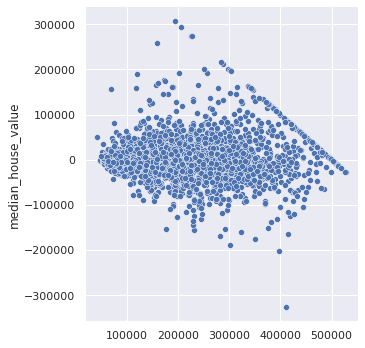

In [88]:
sns.relplot(x=y_pred, y=residuos)

### Como pode se verificar pelo gráfico acima, o modelo não apresenta uma homocedasticidade, a dispersão dos residuos aumentam conforme o valor predito

## Conclusão

### O modelo obteve um bom valor para o R2 (0.868) e se assemelha a uma distribuição normal, ou seja, a maior parte dos erros esta em torno de zero. Entretanto ainda carece de melhorias a fim de obter uma homocedasticidade e passar no teste de normalidade, estas melhorias talvez sejam obtidas com novas variaveis que não foram pensadas durante a execução desta desafio, a utilização de algoritmos como redes neurais ou  uma maior quantidade de dados a ser utilizada no treinamento.